# Neural Network Classification: MNIST Dataset

이 노트북에서는 **MNIST 손글씨 숫자 (0~9)** 데이터셋을 활용하여 신경망 분류 모델을 학습합니다.

## 목표
1. 데이터 불러오기 및 전처리
2. Neural Network 모델 정의
3. 학습 및 학습 곡선 확인
4. 성능 평가 및 예측 시각화


In [ ]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

# 사용 가능한 한글 폰트 찾기
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = [f for f in font_list if any(keyword in f.lower() for keyword in ['apple', 'nanum', 'malgun', 'gothic', 'dotum'])]

# 가장 적합한 한글 폰트 선택
if 'Apple SD Gothic Neo' in korean_fonts:
    selected_font = 'Apple SD Gothic Neo'
elif 'Nanum Myeongjo' in korean_fonts:
    selected_font = 'Nanum Myeongjo'
elif 'AppleGothic' in korean_fonts:
    selected_font = 'AppleGothic'
elif 'Malgun Gothic' in korean_fonts:
    selected_font = 'Malgun Gothic'
else:
    selected_font = korean_fonts[0] if korean_fonts else 'DejaVu Sans'

# 폰트 설정 적용
plt.rcParams.update({
    'font.family': selected_font,
    'font.size': 10,
    'axes.unicode_minus': False,
    'figure.autolayout': True,
    'axes.grid': True,
    'grid.alpha': 0.3
})

print(f"선택된 폰트: {selected_font}")
print("한글 폰트 설정 완료!")

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## 1. 데이터 불러오기

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("원본 데이터 shape:", X_train.shape, y_train.shape)

원본 데이터 shape: (60000, 28, 28) (60000,)


## 2. 데이터 전처리

In [35]:
# 0~255 픽셀값 → 0~1 정규화
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# (28,28) → (784,) 벡터화
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("전처리 후 shape:", X_train.shape, y_train.shape)

전처리 후 shape: (60000, 784) (60000, 10)


## 3. 모델 정의

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(784,)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 컴파일

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 5. 모델 학습

In [38]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9121 - loss: 0.3068 - val_accuracy: 0.9567 - val_loss: 0.1437
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9645 - loss: 0.1184 - val_accuracy: 0.9682 - val_loss: 0.1045
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9770 - loss: 0.0743 - val_accuracy: 0.9717 - val_loss: 0.0926
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9738 - val_loss: 0.0878
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0383 - val_accuracy: 0.9762 - val_loss: 0.0833
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9711 - val_loss: 0.0971
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9930 - loss: 0.0226 - val_accuracy: 0.9770 - val_loss: 0.0861
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9951 - loss: 0.0171 - val_accuracy: 0.

## 6. 학습 곡선 확인

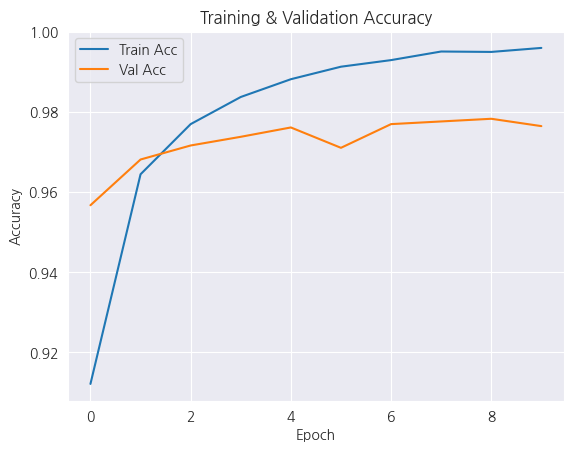

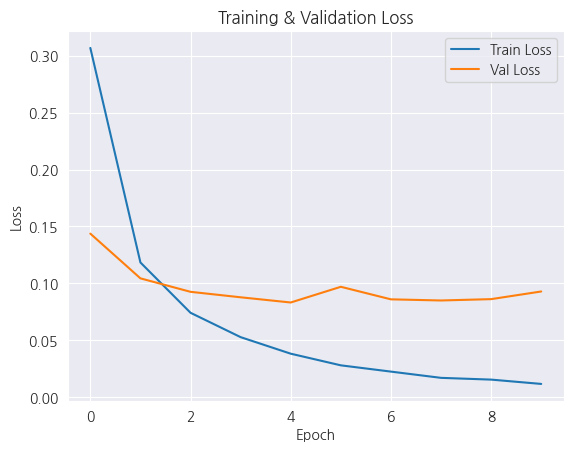

In [39]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 7. 모델 평가

In [40]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {acc:.3f}")

테스트 정확도: 0.977


## 8. 예측 예시 시각화

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


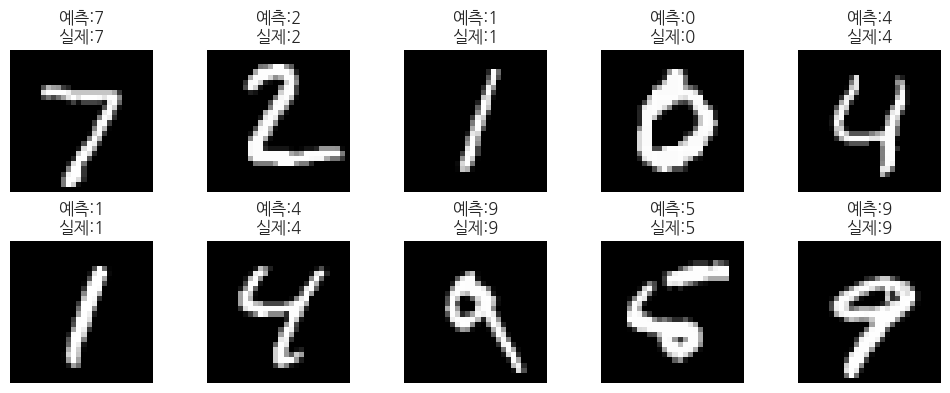

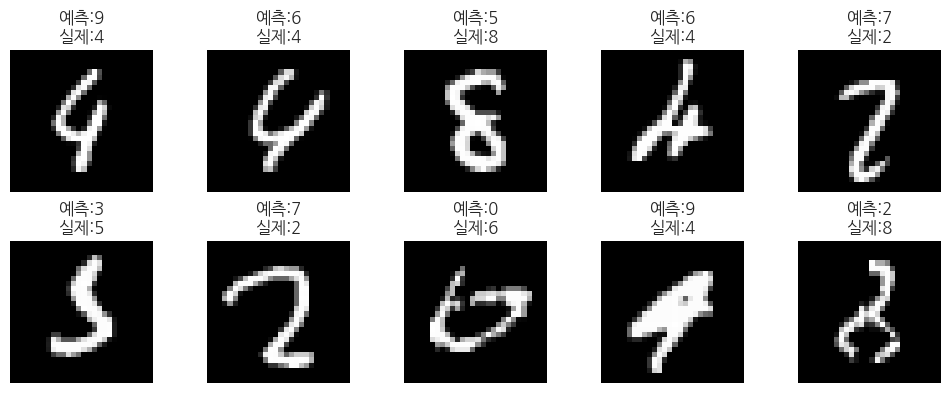

In [41]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

idx = 0
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i+idx].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[i+idx]}\n실제:{y_true[i+idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

failed = y_pred_classes != y_true
failed_idx = np.where(failed)[0]
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[failed_idx[i]].reshape(28,28), cmap="gray")
    plt.title(f"예측:{y_pred_classes[failed_idx[i]]}\n실제:{y_true[failed_idx[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


## 생각해보기
- Training/Validation Graph 에서 과적합(overfitting) 징후가 보이나?